In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## The aim of this notebook is to analyse the dataset  for IEEE CIS Fraud Detection contest 2019 and deploy methods for fraud detection
https://www.kaggle.com/c/ieee-fraud-detection/data 

In [202]:
train_transaction_df = pd.read_csv("ieee-fraud-detection/train_transaction.csv")

#### Reducing dataframe

In [203]:
non_fraud_entries = train_transaction_df[train_transaction_df['isFraud'] == 0][:9700]

fraud_entries = train_transaction_df[train_transaction_df['isFraud'] == 1][:300]

reduced_transaction_df = pd.concat([non_fraud_entries, fraud_entries])


#### Data exploration

In [204]:
reduced_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
nb_columns = len(list(reduced_transaction_df.columns))
print("Column number: " + str(nb_columns))

Column number: 394


In [206]:
column_names = list(reduced_transaction_df.columns)
print("Column names : " + str(column_names))

Column names : ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', '

In [207]:
dataset_size = reduced_transaction_df.shape
print("Dataset size: " + str(dataset_size))

Dataset size: (10000, 394)


In [208]:
column_types = list(reduced_transaction_df.dtypes)
print("Column types:")
for i in range(len(column_names)):
    print(column_names[i]+", "+str(column_types[i]))

Column types:
TransactionID, int64
isFraud, int64
TransactionDT, int64
TransactionAmt, float64
ProductCD, object
card1, int64
card2, float64
card3, float64
card4, object
card5, float64
card6, object
addr1, float64
addr2, float64
dist1, float64
dist2, float64
P_emaildomain, object
R_emaildomain, object
C1, float64
C2, float64
C3, float64
C4, float64
C5, float64
C6, float64
C7, float64
C8, float64
C9, float64
C10, float64
C11, float64
C12, float64
C13, float64
C14, float64
D1, float64
D2, float64
D3, float64
D4, float64
D5, float64
D6, float64
D7, float64
D8, float64
D9, float64
D10, float64
D11, float64
D12, float64
D13, float64
D14, float64
D15, float64
M1, object
M2, object
M3, object
M4, object
M5, object
M6, object
M7, object
M8, object
M9, object
V1, float64
V2, float64
V3, float64
V4, float64
V5, float64
V6, float64
V7, float64
V8, float64
V9, float64
V10, float64
V11, float64
V12, float64
V13, float64
V14, float64
V15, float64
V16, float64
V17, float64
V18, float64
V19, float64
V

In [209]:
nb_non_fraudulent = reduced_transaction_df[reduced_transaction_df['isFraud'] == 0].shape[0]
print("Nb non-fraudulent : " + str(nb_non_fraudulent))

nb_fraudulent = reduced_transaction_df[reduced_transaction_df['isFraud'] == 1].shape[0]
print("Nb fraudulent : " + str(nb_fraudulent))

rate_fraudulent = nb_fraudulent/(nb_non_fraudulent+nb_fraudulent)
print("Rate fraudulent : " + str(rate_fraudulent))

Nb non-fraudulent : 9700
Nb fraudulent : 300
Rate fraudulent : 0.03


In [210]:
numerical_columns = reduced_transaction_df._get_numeric_data().columns

categorical_columns = list(set(reduced_transaction_df)-set(numerical_columns))
print("Categorical columns : "+str(categorical_columns))

categorical_values = [reduced_transaction_df[categorie].unique() for categorie in categorical_columns ]
print("Categorical values : "+str(categorical_values))

Categorical columns : ['ProductCD', 'R_emaildomain', 'P_emaildomain', 'M7', 'M3', 'M5', 'card6', 'M2', 'M8', 'M4', 'card4', 'M1', 'M6', 'M9']
Categorical values : [array(['W', 'H', 'C', 'S', 'R'], dtype=object), array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de'], dtype=object), array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.ne

In [211]:
print("Numerical columns : "+str(numerical_columns))

numerical_values = [reduced_transaction_df[numerical].unique() for numerical in numerical_columns ]
print("Numerical values : "+str(numerical_values))

Numerical columns : Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)
Numerical values : [array([2987000, 2987001, 2987002, ..., 2998035, 2998043, 2998173],
      dtype=int64), array([0, 1], dtype=int64), array([ 86400,  86401,  86469, ..., 330738, 330852, 333007], dtype=int64), array([ 68.5  ,  29.   ,  59.   , ...,  97.457, 130.991,  30.75 ]), array([13926,  2755,  4663, ..., 16208, 13593,  4993], dtype=int64), array([ nan, 404., 490., 567., 514., 555., 360., 100., 111., 352., 375.,
       418., 303., 314., 543., 583., 148., 321., 269., 361., 272., 399.,
       569., 453., 417., 512., 545., 266., 114., 481., 452., 547., 383.,
       170., 343., 556., 285., 562., 302., 264., 558., 500., 396., 103.,
       206., 143., 243., 476., 199., 174., 423., 446., 492., 523., 440

In [212]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

describe(reduced_transaction_df, ['median'])

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,9879.000000,9999.000000,9977.000000,9085.000000,9085.000000,...,1390.000000,1390.000000,1390.000000,1390.000000,1390.00000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,2.992002e+06,0.030000,186946.307400,131.697962,9821.72530,349.298006,152.747675,200.339581,292.408035,87.006935,...,0.120863,39.364029,56.883453,46.094245,1.40000,12.184173,4.766906,12.510791,16.933094,13.579137
std,2.890704e+03,0.170596,56659.009503,215.322897,4778.43846,157.706139,10.214671,39.075703,103.693677,0.249739,...,0.504619,246.807743,279.793901,256.895001,10.50899,79.039076,41.790872,85.985530,110.775708,90.175690
min,2.987000e+06,0.000000,86400.000000,1.896000,1011.00000,100.000000,100.000000,100.000000,110.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.989500e+06,0.000000,146628.750000,44.492500,6360.25000,194.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.992000e+06,0.000000,171644.000000,74.970000,9500.00000,327.000000,150.000000,224.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.994499e+06,0.000000,240112.000000,134.950000,13780.00000,500.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.998173e+06,1.000000,333007.000000,3247.910000,18390.00000,600.000000,225.000000,237.000000,536.000000,96.000000,...,6.000000,6300.000000,6300.000000,6300.000000,150.00000,1300.000000,1300.000000,1500.000000,1630.000000,1500.000000
median,2.992000e+06,0.000000,171644.000000,74.970000,9500.00000,327.000000,150.000000,224.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [213]:
print("Rate of undefined values")
for column in reduced_transaction_df.columns:
    nan_number = reduced_transaction_df[column].isna().sum()
    rate = nan_number/(reduced_transaction_df.shape[0])
    print(str(reduced_transaction_df[column].name) + ", " + str(rate))

Rate of undefined values
TransactionID, 0.0
isFraud, 0.0
TransactionDT, 0.0
TransactionAmt, 0.0
ProductCD, 0.0
card1, 0.0
card2, 0.0121
card3, 0.0001
card4, 0.0001
card5, 0.0023
card6, 0.0001
addr1, 0.0915
addr2, 0.0915
dist1, 0.6618
dist2, 0.9625
P_emaildomain, 0.2099
R_emaildomain, 0.8366
C1, 0.0
C2, 0.0
C3, 0.0
C4, 0.0
C5, 0.0
C6, 0.0
C7, 0.0
C8, 0.0
C9, 0.0
C10, 0.0
C11, 0.0
C12, 0.0
C13, 0.0
C14, 0.0
D1, 0.0
D2, 0.4585
D3, 0.4283
D4, 0.6232
D5, 0.7234
D6, 0.9507
D7, 0.9775
D8, 0.8898
D9, 0.8898
D10, 0.1268
D11, 0.7732
D12, 0.9593
D13, 0.972
D14, 0.9544
D15, 0.494
M1, 0.5794
M2, 0.5794
M3, 0.5794
M4, 0.4879
M5, 0.5788
M6, 0.2579
M7, 0.7868
M8, 0.7868
M9, 0.7868
V1, 0.7732
V2, 0.7732
V3, 0.7732
V4, 0.7732
V5, 0.7732
V6, 0.7732
V7, 0.7732
V8, 0.7732
V9, 0.7732
V10, 0.7732
V11, 0.7732
V12, 0.1269
V13, 0.1269
V14, 0.1269
V15, 0.1269
V16, 0.1269
V17, 0.1269
V18, 0.1269
V19, 0.1269
V20, 0.1269
V21, 0.1269
V22, 0.1269
V23, 0.1269
V24, 0.1269
V25, 0.1269
V26, 0.1269
V27, 0.1269
V28, 0.1269

In [214]:
print("Rate of zero values")
for column in numerical_columns:
    zero_number = list(reduced_transaction_df[column]).count(0)
    rate = zero_number/(reduced_transaction_df.shape[0])
    print(str(reduced_transaction_df[column].name) + ", " + str(rate))

Rate of zero values
TransactionID, 0.0
isFraud, 0.97
TransactionDT, 0.0
TransactionAmt, 0.0
card1, 0.0
card2, 0.0
card3, 0.0
card5, 0.0
addr1, 0.0
addr2, 0.0
dist1, 0.0313
dist2, 0.0036
C1, 0.0007
C2, 0.0003
C3, 0.991
C4, 0.8347
C5, 0.6029
C6, 0.1013
C7, 0.9094
C8, 0.7806
C9, 0.2987
C10, 0.7899
C11, 0.0005
C12, 0.9087
C13, 0.0497
C14, 0.0503
D1, 0.4531
D2, 0.0221
D3, 0.1317
D4, 0.1105
D5, 0.0492
D6, 0.0315
D7, 0.0073
D8, 0.0015
D9, 0.0075
D10, 0.3396
D11, 0.0667
D12, 0.0275
D13, 0.0231
D14, 0.0347
D15, 0.1184
V1, 0.0004
V2, 0.0004
V3, 0.0004
V4, 0.0552
V5, 0.0529
V6, 0.0004
V7, 0.0004
V8, 0.0004
V9, 0.0004
V10, 0.1105
V11, 0.1099
V12, 0.524
V13, 0.4998
V14, 0.0002
V15, 0.8385
V16, 0.8385
V17, 0.8364
V18, 0.8364
V19, 0.3874
V20, 0.3797
V21, 0.8369
V22, 0.8369
V23, 0.0005
V24, 0.0005
V25, 0.2209
V26, 0.2205
V27, 0.8718
V28, 0.8718
V29, 0.5782
V30, 0.5763
V31, 0.8304
V32, 0.8304
V33, 0.8385
V34, 0.8385
V35, 0.1991
V36, 0.1883
V37, 0.0006
V38, 0.0006
V39, 0.3343
V40, 0.3343
V41, 0.0006
V42

#### Dataset visualisation

In [215]:

def show3D_transation_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    xs = transac_dataset[x_axis_name]
    ys = transac_dataset[y_axis_name]
    zs = transac_dataset[z_axis_name]
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)

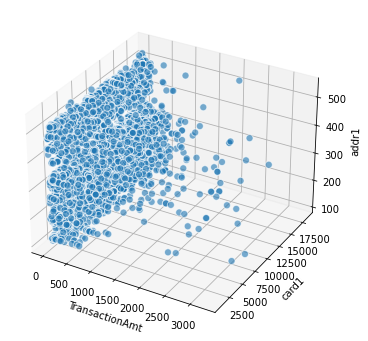

In [216]:
show3D_transation_data(reduced_transaction_df,'TransactionAmt', 'card1','addr1')

In [217]:
def show3D_transation_data_fraud_only(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    transac_dataset_fraud_only = transac_dataset[transac_dataset['isFraud'] == 1]

    xs = transac_dataset_fraud_only[x_axis_name]
    ys = transac_dataset_fraud_only[y_axis_name]
    zs = transac_dataset_fraud_only[z_axis_name]
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, color = 'red', edgecolors='w')
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)

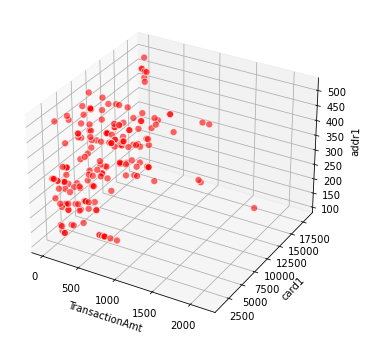

In [218]:
show3D_transation_data_fraud_only(reduced_transaction_df,'TransactionAmt', 'card1','addr1')

#### Dataset cleaning

In [219]:
X = reduced_transaction_df[categorical_columns].copy()
one_hot_encoded = pd.get_dummies(X)
print(one_hot_encoded)

       ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S  ProductCD_W  \
0                0            0            0            0            1   
1                0            0            0            0            1   
2                0            0            0            0            1   
3                0            0            0            0            1   
4                0            1            0            0            0   
...            ...          ...          ...          ...          ...   
11003            0            0            0            0            1   
11019            0            1            0            0            0   
11035            0            0            0            0            1   
11043            0            0            0            0            1   
11173            0            0            1            0            0   

       R_emaildomain_aim.com  R_emaildomain_anonymous.com  \
0                          0                      

In [220]:

one_hot_encoded=one_hot_encoded.join(X_num[['TransactionAmt', 'card1','addr1','isFraud']])

my_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
X_imputed = pd.DataFrame(my_imputer.fit_transform(one_hot_encoded))
X_imputed.columns = one_hot_encoded.columns

X_num = reduced_transaction_df[numerical_columns].copy()

X_imputed

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,...,card4_visa,M1_T,M6_F,M6_T,M9_F,M9_T,TransactionAmt,card1,addr1,isFraud
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,68.5,13926.0,315.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,29.0,2755.0,325.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,59.0,4663.0,330.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,50.0,18132.0,476.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,4497.0,420.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,54.0,3507.0,204.0,1.0
9996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,150.0,3821.0,264.0,1.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,171.0,4993.0,123.0,1.0
9998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,39.0,16727.0,204.0,1.0


In [221]:
existing_nan = X_imputed.isnull().values.any()
print(existing_nan)

False


#### Isolation forests

In [222]:

outliers_fraction = 0.03

isolation_clf = IsolationForest(max_samples = 200, random_state=0, contamination = outliers_fraction).fit(X_imputed)
dtransac_outliers = isolation_clf.predict(X_imputed)

In [223]:
X_imputed_outliers = X_imputed.copy()


X_imputed_outliers['if_outliers'] = dtransac_outliers

X_imputed_outliers.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,...,M1_T,M6_F,M6_T,M9_F,M9_T,TransactionAmt,card1,addr1,isFraud,if_outliers
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,68.5,13926.0,315.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,29.0,2755.0,325.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,59.0,4663.0,330.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,50.0,18132.0,476.0,0.0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50.0,4497.0,420.0,0.0,1


In [224]:
found_outliers = X_imputed_outliers[X_imputed_outliers['if_outliers'] == -1]
found_outliers

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,...,M1_T,M6_F,M6_T,M9_F,M9_T,TransactionAmt,card1,addr1,isFraud,if_outliers
135,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,3000.00,2616.0,330.0,0.0,-1
175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,117.00,18227.0,325.0,0.0,-1
201,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,2547.46,11106.0,204.0,0.0,-1
211,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,117.00,2560.0,264.0,0.0,-1
217,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,117.00,12469.0,330.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,982.00,16208.0,143.0,1.0,-1
9988,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,335.00,4591.0,433.0,1.0,-1
9995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,54.00,3507.0,204.0,1.0,-1
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,171.00,4993.0,123.0,1.0,-1


In [225]:
X_imputed_outliers["if_outliers"].value_counts()

 1    9700
-1     300
Name: if_outliers, dtype: int64

In [226]:
vp=0
vn=0
fn=0
fp=0
for index, row in X_imputed_outliers.iterrows():
    if row['isFraud']==0 and row['if_outliers']==1:
        vn+=1
    if row['isFraud']==1 and row['if_outliers']==-1:
        vp+=1
    if row['isFraud']==0 and row['if_outliers']==-1:
        fn+=1
    if row['isFraud']==1 and row['if_outliers']==1:
        fp+=1
print("True positive: "+str(vp))
print("True negative: "+str(vn))
print("False positive: "+str(fp))
print("False negative: "+str(fn))        


True positive: 48
True negative: 9448
False positive: 252
False negative: 252


In [227]:
def show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    transac_dataset_outliers_only = transac_dataset[transac_dataset['if_outliers'] == -1]

    xs = transac_dataset_outliers_only[x_axis_name]
    ys = transac_dataset_outliers_only[y_axis_name]
    zs = transac_dataset_outliers_only[z_axis_name]
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, color = 'red', edgecolors='w')
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)

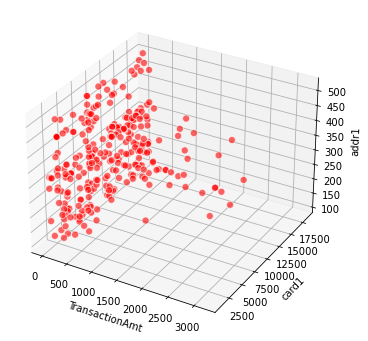

In [228]:
show3D_transation_data_if_outliers_only(X_imputed_outliers,'TransactionAmt', 'card1','addr1')

#### Local Outlier Factor

In [229]:

outliers_fraction = 0.03

local_outlier_clf = LocalOutlierFactor( novelty=True,contamination = outliers_fraction).fit(X_imputed)
dtransac_outliers = local_outlier_clf.predict(X_imputed)

In [230]:
X_imputed_outliers['lof_outliers'] = dtransac_outliers

X_imputed_outliers.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,...,M6_F,M6_T,M9_F,M9_T,TransactionAmt,card1,addr1,isFraud,if_outliers,lof_outliers
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,68.5,13926.0,315.0,0.0,1,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,29.0,2755.0,325.0,0.0,1,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,59.0,4663.0,330.0,0.0,1,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,50.0,18132.0,476.0,0.0,1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50.0,4497.0,420.0,0.0,1,1


In [231]:
found_outliers = X_imputed_outliers[X_imputed_outliers['lof_outliers'] == -1]
found_outliers

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,...,M6_F,M6_T,M9_F,M9_T,TransactionAmt,card1,addr1,isFraud,if_outliers,lof_outliers
20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,39.000,7875.0,299.000000,0.0,1,-1
49,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.595,12730.0,292.408035,0.0,1,-1
106,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,92.000,12733.0,327.000000,0.0,1,-1
110,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1153.950,1214.0,337.000000,0.0,1,-1
133,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2594.950,14349.0,315.000000,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2161.000,9500.0,251.000000,1.0,-1,-1
9788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1187.000,12839.0,220.000000,1.0,-1,-1
9806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,103.197,5812.0,292.408035,1.0,-1,-1
9872,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,59.000,3121.0,337.000000,1.0,1,-1


In [232]:
X_imputed_outliers["lof_outliers"].value_counts()

 1    9744
-1     256
Name: lof_outliers, dtype: int64

In [233]:
vp=0
vn=0
fn=0
fp=0
for index, row in X_imputed_outliers.iterrows():
    if row['isFraud']==0 and row['lof_outliers']==1:
        vp+=1
    if row['isFraud']==1 and row['lof_outliers']==-1:
        vn+=1
    if row['isFraud']==0 and row['lof_outliers']==-1:
        fp+=1
    if row['isFraud']==1 and row['lof_outliers']==1:
        fn+=1
print("True positive: "+str(vp))
print("True negative: "+str(vn))
print("False positive: "+str(fp))
print("False negative: "+str(fn))


True positive: 9450
True negative: 6
False positive: 250
False negative: 294


In [234]:
def show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    transac_dataset_outliers_only = transac_dataset[transac_dataset['lof_outliers'] == -1]

    xs = transac_dataset_outliers_only[x_axis_name]
    ys = transac_dataset_outliers_only[y_axis_name]
    zs = transac_dataset_outliers_only[z_axis_name]
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, color = 'red', edgecolors='w')
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)

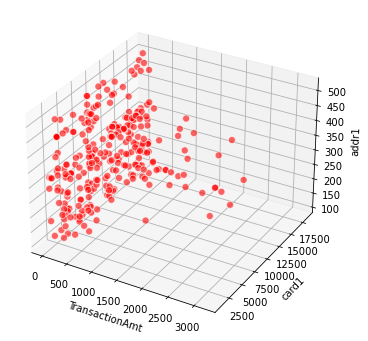

In [235]:
show3D_transation_data_if_outliers_only(X_imputed_outliers,'TransactionAmt', 'card1','addr1')

#### Comparison of IsolationForest and LOF

#### 21.1

In [236]:
X_imputed_outliers[(X_imputed_outliers["lof_outliers"]==-1) & (X_imputed_outliers["if_outliers"]==-1)]
# # There are 20 common outliers

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,...,M6_F,M6_T,M9_F,M9_T,TransactionAmt,card1,addr1,isFraud,if_outliers,lof_outliers
135,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3000.000,2616.0,330.000000,0.0,-1,-1
435,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3162.950,1893.0,441.000000,0.0,-1,-1
451,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3162.950,1893.0,441.000000,0.0,-1,-1
509,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2424.950,15066.0,220.000000,0.0,-1,-1
2799,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1234.950,15063.0,264.000000,0.0,-1,-1
3509,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1950.380,8009.0,325.000000,0.0,-1,-1
3599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,997.470,10486.0,204.000000,0.0,-1,-1
3754,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1052.000,15497.0,299.000000,0.0,-1,-1
3762,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2079.950,16075.0,325.000000,0.0,-1,-1
3809,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1877.070,9043.0,264.000000,0.0,-1,-1


In [237]:
def f(row):
    if row['lof_outliers'] == -1 and row['if_outliers']==-1:
        val = "green"
    elif row['lof_outliers'] == 1 and row['if_outliers']==-1:
        val = "red"
    else:
        val = "blue"
    return val


def show3D_transation_data_if_and_lof_outliers(transac_dataset, x_axis_name, y_axis_name,
z_axis_name):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    transac_dataset_outliers_only = transac_dataset[(transac_dataset['lof_outliers'] == -1)|(transac_dataset['if_outliers'] == -1)]

    transac_dataset_outliers_only['Color'] = transac_dataset_outliers_only.apply(f, axis=1)
    xs = transac_dataset_outliers_only[x_axis_name]
    ys = transac_dataset_outliers_only[y_axis_name]
    zs = transac_dataset_outliers_only[z_axis_name]
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, color = transac_dataset_outliers_only.Color, edgecolors='w')
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)

C:\Users\pault\AppData\Local\Temp/ipykernel_13536/849577484.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transac_dataset_outliers_only['Color'] = transac_dataset_outliers_only.apply(f, axis=1)


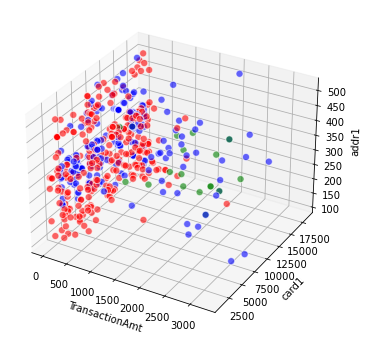

In [238]:
show3D_transation_data_if_and_lof_outliers(X_imputed_outliers,'TransactionAmt', 'card1','addr1')


#The common outliers to the two alogorithms are in green, the ones that are just of IsolationForest in red, and the one just of LOF in blue

In [239]:


transac_dataset_outliers_only = X_imputed_outliers[(X_imputed_outliers['lof_outliers'] == -1)|(X_imputed_outliers['if_outliers'] == -1)]

transac_dataset_outliers_only['Color'] = transac_dataset_outliers_only.apply(f, axis=1)

transac_dataset_outliers_only["Color"].value_counts()

C:\Users\pault\AppData\Local\Temp/ipykernel_13536/1079392151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transac_dataset_outliers_only['Color'] = transac_dataset_outliers_only.apply(f, axis=1)


red      280
blue     236
green     20
Name: Color, dtype: int64

In [240]:
X_imputed_outliers[(X_imputed_outliers["lof_outliers"]==-1) & (X_imputed_outliers["if_outliers"]==-1)  & (X_imputed_outliers["isFraud"]==1)]
# There are 3 common fraudulent outliers

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,...,M6_F,M6_T,M9_F,M9_T,TransactionAmt,card1,addr1,isFraud,if_outliers,lof_outliers
9718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2161.000,9500.0,251.000000,1.0,-1,-1
9788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1187.000,12839.0,220.000000,1.0,-1,-1
9806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,103.197,5812.0,292.408035,1.0,-1,-1
